# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df['asfixia'] = np.where(
    df['APGAR5'] <=3 , 'asfixia grave',
    np.where(df['APGAR5'] <= 5, 'asfixia moderada',
             np.where(df['APGAR5'] <= 7, 'asfixia leve', 'normal')))

df['asfixia'].value_counts()

asfixia
normal              26566
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

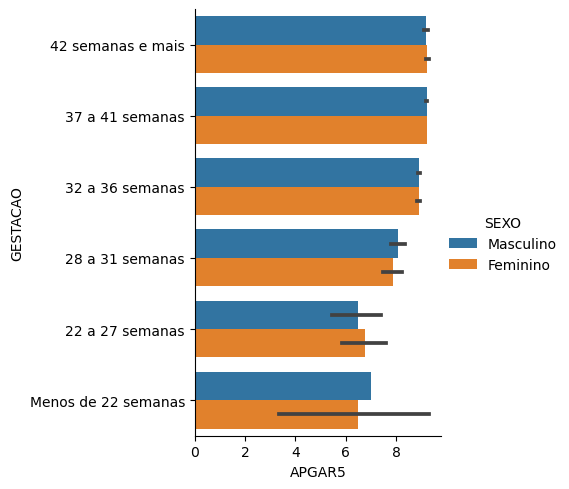

In [4]:
sns.catplot(x='APGAR5', y='GESTACAO'
            , hue = 'SEXO'
            , kind='bar'
            , data=df
            ,order=["42 semanas e mais", "37 a 41 semanas", "32 a 36 semanas", "28 a 31 semanas", "22 a 27 semanas", "Menos de 22 semanas"]
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
row_order = ['42 semanas e mais', '37 a 41 semanas', '32 a 36 semanas', '28 a 31 semanas', '22 a 27 semanas', 'Menos de 22 semanas']

freq = pd.crosstab(df['GESTACAO'], df['APGAR5']).loc[row_order]
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
freq_apgar = freq.div(freq.sum(axis = 1), axis = 0)
freq_apgar

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

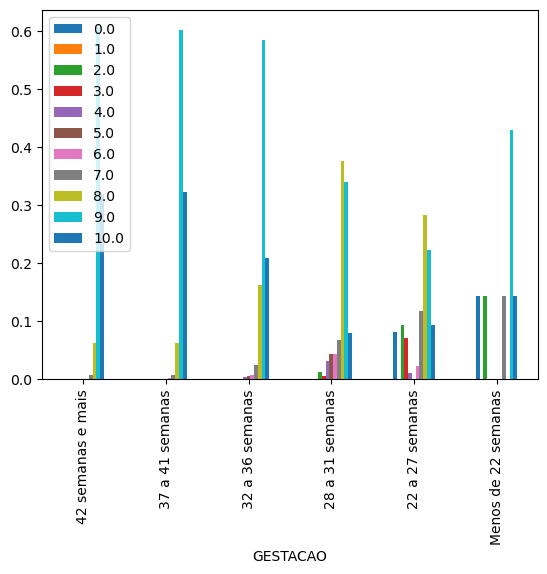

In [7]:
freq_apgar.plot.bar().legend(loc='upper left')

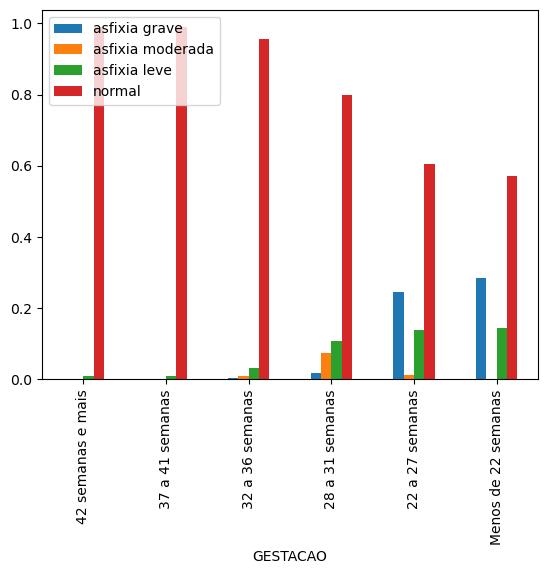

In [8]:
column_order = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']
freq2 = pd.crosstab(df['GESTACAO'], df['asfixia']).loc[row_order, column_order]
freq_apgar2 = freq2.div(freq2.sum(axis = 1), axis = 0)
freq_apgar2.plot.bar().legend(loc='upper left')

CONCLUSÃO:
Pelos gráficos acima, é possível ver que de 37 semanas ou mais temos somentes APGAR5 considerados "normais" (de 8 a 10) ou com "asfixia leve" (6 ou 7). Partos com menos de 37 semanas possuem uma ocorrência muito maior de axfixia moderada ou grave. Sendo assim, concluo que este conjunto de dados corrobora a afirmação dos médicos de que parto pode ser considerado prematuro quando a gestação tem menos que 37 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

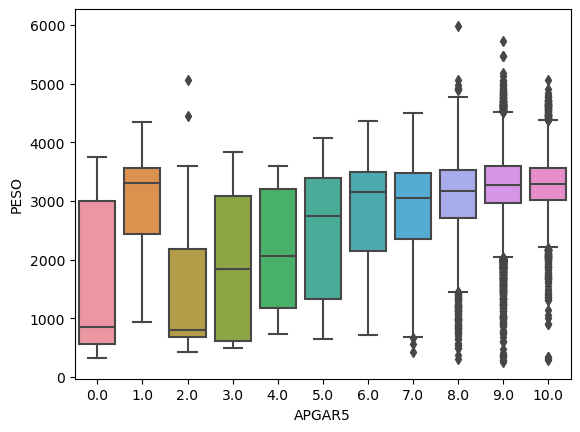

In [9]:
sns.boxplot(x="APGAR5", y="PESO", data=df)

No gráfico acima, vemos que conforme observamos APGAR5 maiores, maior é o peso do bebê (tirando poucas exceções). Portanto, há relação entre APGAR5 e o peso do bebê.